# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
- Trees are constructed by splitting data into different data points. All trees start with a root node, and make splits at decision nodes until a leaf node is made. 

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
- trees are able to handle non-linear relationshops by finding general trends when splitting data from features. Taking the average of many decisions helps capture more accurate results. This is very different from linear models, which assume a direct relationship between variables. 

3. Why is the Gini a good loss function for categorical target variables? 
- Gini impurity measures the probability of misclassifying a randomly chosen element. Having the model improve based on Gini impurity can helps minimize error at each split. 

4. Why do trees tend to overfit, and how can this tendency be constrained? 
- Trees have a tendency to overfit because they could technically fit the data perfectly, with each observation being a different leaf node. To constrain this, fit parameters like tree depth, min node split, min leaf split, gamma, etc. 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
- False, trees can handle numerical variables as well for regression problems. There doesnt need to be lots of variables as features for trees to perform well either. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
- Having more than two branches after a split makes the decision making much more complicated. More branches would also lead to overfitting when having greater depths could do the same thing. 

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
- You can compare the predictive accuracy on the training and testing sets - if it is doing really good on the training set and badly on the testing set, it is probably overfitting. If the trees have high depths and many leaves, it could also be signs of overfitting. 

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

num rows and columns (976, 12)

variables Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

df head    Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual 

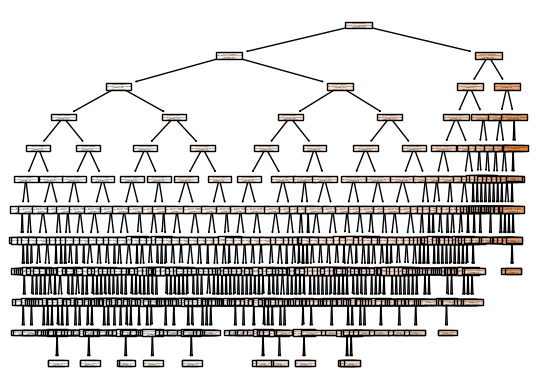

c:\Users\elain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


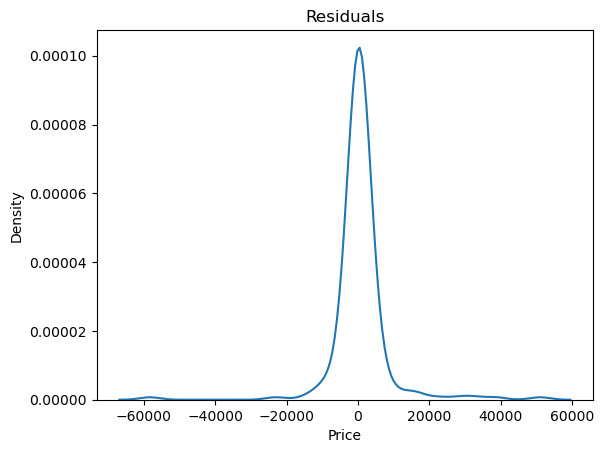

Linear regression R^2: 1.0, RMSE: 3.399086450261134e-10
Linear regression performs better on the test set. The r^2 is exactly 1, so the relationship between these features and price must be linear


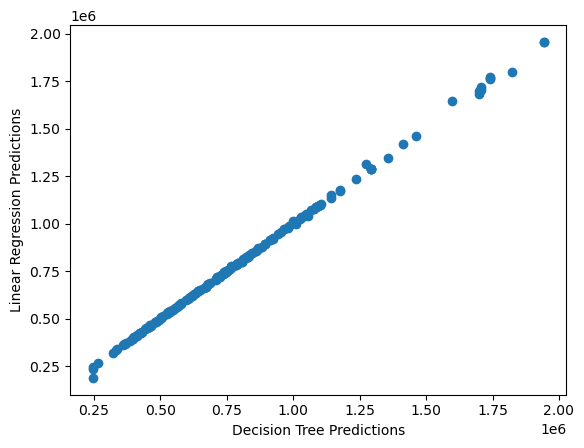

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#1
df = pd.read_csv('./data/cars_hw.csv')
print('num rows and columns', df.shape)  
print('\nvariables', df.columns) 
print('\ndf head', df.head())  

#2
df_encoded = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type'], drop_first=True)
X = pd.concat([df_encoded, df[['Mileage_Run', 'Make_Year', 'Seating_Capacity']]], axis = 1)
Y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)

#3
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
r2s = []
for i in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2s.append(r2)
    if r2 == max(r2s):
        best_i = i
        best_r2 = r2
print(f'best min_samples_leaf: {best_i}, best R^2: {best_r2}')

#4
model = DecisionTreeRegressor(min_samples_leaf=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'R^2: {r2}, RMSE: {rmse}')
var_names = model.feature_names_in_
plot_tree(model,filled=True,feature_names=var_names)
plt.show()
e = y_test - y_pred
sns.kdeplot(e).set(title='Residuals') # Notice the residuals aren't centered around zero
plt.show()
print("yes, they are centered around 0")

#5
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'Linear regression R^2: {r2}, RMSE: {rmse}')
print('Linear regression performs better on the test set. The r^2 is exactly 1, so the relationship between these features and price must be linear')

#6
y_pred_tree = model.predict(X_test)
y_pred_lr = lr.predict(X_test)
plt.scatter(y_pred_tree, y_pred_lr)
plt.xlabel('Decision Tree Predictions')
plt.ylabel('Linear Regression Predictions')
plt.show()
print('The values are very very similar. It is almost a directly linear relationship, but tends to underestimate when prices are lower and slightly overestimate when prices are higher. ')


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

num rows and columns (2509, 34)

variables Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

df head   Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0

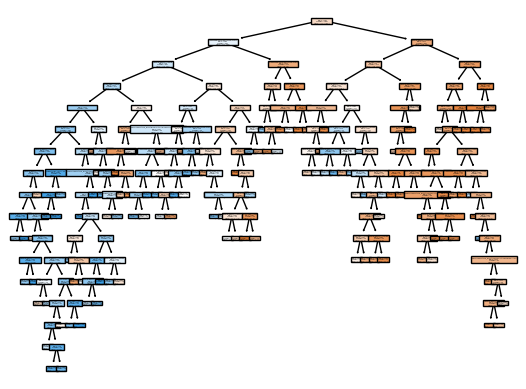

Accuracy  :  0.5743073047858942 

Predicted  0.0  1.0
Actual             
0.0        151   62
1.0        107   77
True Positive Rate:  0.41847826086956524
True Negative Rate:  0.7089201877934272
Since the true negatiev rate is higher than the true positive rate, the model is better at classifying deceased patients accurately. 
best min_samples_leaf: 102, best R^2: 0.1559537040361283
R^2: 0.1559537040361283, RMSE: 71.14729356642468


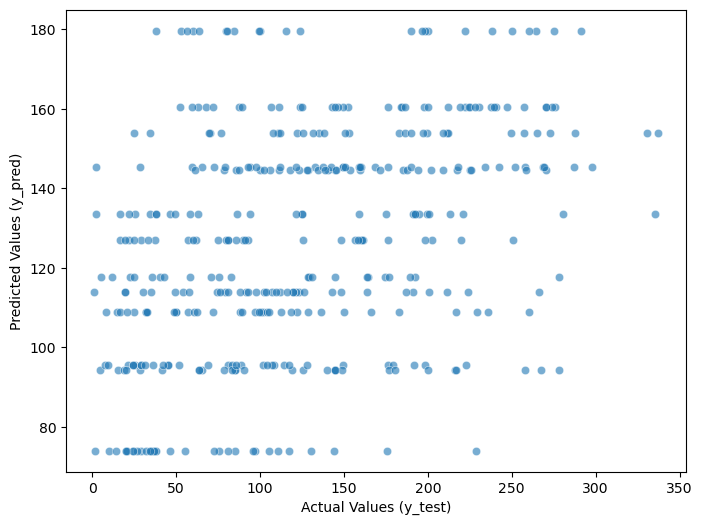

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

#1
df = pd.read_csv('./data/Breast Cancer METABRIC.csv')
print('num rows and columns', df.shape)  
print('\nvariables', df.columns) 
print('\ndf head', df.head())  
#2
df_num = df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']]
df_cat = df[['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]
df_encoded = pd.get_dummies(df_cat, drop_first=True)
X = pd.concat([df_encoded, df_num], axis = 1)
#3
Y = df['Overall Survival Status']
Y = Y.map({'Living': 1, 'Deceased': 0})
non_missing = Y.notna()
X = X.loc[non_missing]
Y = Y.loc[non_missing]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)
model = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'R^2: {r2}, RMSE: {rmse}')
var_names = model.feature_names_in_
plot_tree(model,filled=True,feature_names=var_names)
plt.show()
#confusion matrix
print('Accuracy  : ', model.score(X_test, y_test), '\n')
print(pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted']))
#4
TN = 151
FP = 62
FN = 107
TP = 77
TPR = TP / (TP + FN)
print('True Positive Rate: ', TPR)
TNR = TN / (TN + FP)
print('True Negative Rate: ', TNR)
print('Since the true negatiev rate is higher than the true positive rate, the model is better at classifying deceased patients accurately. ')
#5. What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?
Y1 = df['Overall Survival (Months)']
non_missing = Y1.notna()
X = X.loc[non_missing]
Y1 = Y1.loc[non_missing]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y1, test_size=0.2, random_state=0
)
r2s_again = []
for i in range(100, 120):
    model = DecisionTreeRegressor(min_samples_leaf=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2s_again.append(r2)
    if r2 == max(r2s_again):
        best_i = i
        best_r2 = r2
print(f'best min_samples_leaf: {best_i}, best R^2: {best_r2}')
model = DecisionTreeRegressor(min_samples_leaf=102, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'R^2: {r2}, RMSE: {rmse}')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()
print("No, I would not trust this model at all for clinical purposes, as the predictions are very bad")






**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?